## Logistic Regression 

In this notebook, you will be trying out some of the model diagnostics, there will only be two cases - either admitted or not admitted.


### Model 1

- You will find the data used in `model 1` attached with the notebook 

In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r"F:\Python\EP\New folder (2)\admissions.csv")
df.head()

,admit,score,gpa,majors
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
df.shape

(397, 4)

In [5]:
df.isnull().sum()

admit     0
score     0
gpa       0
majors    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   397 non-null    int64  
 1   score   397 non-null    int64  
 2   gpa     397 non-null    float64
 3   majors  397 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.5 KB


In [7]:
 pd.get_dummies(df['majors'])

,1,2,3,4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
392,0,1,0,0
393,0,0,1,0
394,0,1,0,0
395,0,1,0,0


In [8]:
df[['major_1', 'major_2', 'major_3', 'major_4']] = pd.get_dummies(df['majors'])
df

,admit,score,gpa,majors,major_1,major_2,major_3,major_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1
...,...,...,...,...,...,...,...,...
392,0,620,4.00,2,0,1,0,0
393,0,560,3.04,3,0,0,1,0
394,0,460,2.63,2,0,1,0,0
395,0,700,3.65,2,0,1,0,0


- Seperate **feature column/s** and **target columns** 

In [9]:
X = df.drop(['admit', 'majors', 'major_1'] , axis=1)
y = df['admit']

- **VIF** test (Variance Inflation Factor)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

   feature        VIF
0    score  30.730378
1      gpa  35.699554
2  major_2   3.148138
3  major_3   2.828325
4  major_4   1.941527


In [11]:
X = df.drop(['admit', 'majors', 'major_1', 'score'] , axis=1)
y = df['admit']

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

   feature       VIF
0      gpa  5.902121
1  major_2  3.141302
2  major_3  2.819456
3  major_4  1.941363


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [16]:
obj = LogisticRegression()
obj.fit(X_train, y_train)
preds = obj.predict(X_test)

In [17]:
accuracy_score(y_test, preds)

0.75

In [18]:
cf_matrix = confusion_matrix(y_test, preds) 
cf_matrix

array([[55,  1],
       [19,  5]], dtype=int64)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

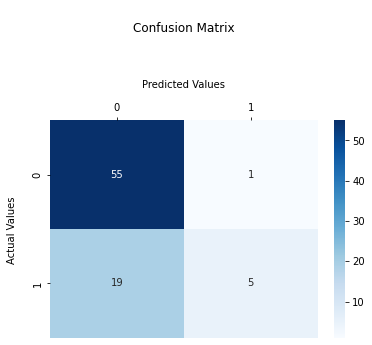

In [20]:
ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='1', cmap='Blues')

ax.set_title('\nConfusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values\n') 
ax.xaxis.set_label_position('top')
ax.set_ylabel('Actual Values \n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.xaxis.tick_top() 
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [21]:
y_test.value_counts()

0    56
1    24
Name: admit, dtype: int64

- Try out a few additional metrics: [precision](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), and [accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) are all popular metrics.  You could compute these directly from the confusion matrix, but you can also use these built in functions in sklearn.

- Another very popular set of metrics are [ROC curves and AUC](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py).  These actually use the probability from the logistic regression models, and not just the label.  [This](http://blog.yhat.com/posts/roc-curves.html) is also a great resource for understanding ROC curves and AUC.


### Model 2
You can download `Credit Card Fraud Detection` data from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [22]:
df = pd.read_csv(r"F:\Python\EP\New folder (2)\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [23]:
df.duplicated().sum()

1081

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
df.drop('Time', axis=1, inplace=True)

In [27]:
X = df.iloc[:,df.columns!='Class' ]
y = df['Class']

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,V1,1.248260
1,V2,2.375488
2,V3,1.213926
3,V4,1.047219
4,V5,1.716571
5,V6,1.225610
6,V7,1.756804
7,V8,1.052477
8,V9,1.009985
9,V10,1.050030


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [30]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Standarization

In [31]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [32]:
obj = LogisticRegression()
obj.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
X_test_scaled = scaler.transform(X_test)
y_pred = obj.predict(X_test_scaled)

In [34]:
cf_matrix = confusion_matrix(y_test, y_pred) 
cf_matrix

array([[56646,     8],
       [   28,    64]], dtype=int64)

In [35]:
accuracy_score(y_test, y_pred)

0.999365594050682

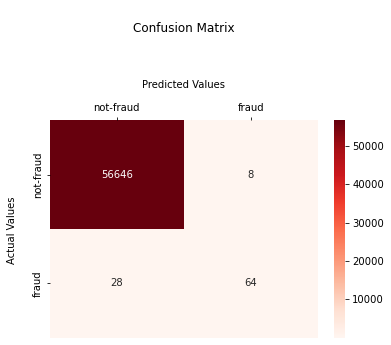

In [36]:
ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='1', cmap='Reds')

ax.set_title('\nConfusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values\n') 
ax.xaxis.set_label_position('top')
ax.set_ylabel('Actual Values \n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['not-fraud','fraud'])
ax.xaxis.tick_top() 
ax.yaxis.set_ticklabels(['not-fraud','fraud'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [37]:
y_test.value_counts()

0    56654
1       92
Name: Class, dtype: int64

In [39]:
recall_score(y_test, y_pred)

0.6956521739130435

In [40]:
precision_score(y_test, y_pred)

0.8888888888888888